# <center> Projeto geoprocessamento Parques Municipais Cidade de São Paulo </center>

<p> O referido projeto busca trabalhar com o geoprocessamento com o uso de dados dos distritos do Município e de seus parques Municipais. Espera-se obter <italic>insigths</italic> com este cruzamento de dados.</p>


# 1 Iniciando estudos de dados

## 

```
# Isto está formatado como código
```

1.1 Instalando e importando biblioteccas

In [ ]:
pip install geopandas

In [ ]:
pip install folium

In [ ]:
pip install requests

In [ ]:
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
import requests
import zipfile
import os

## 1.2 Importando dados

In [ ]:
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### 1.2.1 Importando dados dos distritos do Município de São Paulo direto da fonte:
[texto do link](http://datageo.ambiente.sp.gov.br/geoserver/datageo/DISTRITO_MUNICIPAL_SP_SMDU/wfs?version=1.0.0&request=GetFeature&outputFormat=SHAPE-ZIP&typeName=DISTRITO_MUNICIPAL_SP_SMDU", dest_folder="/content/drive/MyDrive/Colab Notebooks/SP_Municipio_2021)

In [ ]:
def download(url: str, dest_folder: str):
    if not os.path.exists(dest_folder):
        os.makedirs(dest_folder)  # create folder if it does not exist

    filename = url.split('/')[-1].replace(" ", "_")  # be careful with file names
    file_path = os.path.join(dest_folder, filename)

    r = requests.get(url, stream=True)
    if r.ok:
        print("saving to", os.path.abspath(file_path))
        with open(file_path, 'wb') as f:
            for chunk in r.iter_content(chunk_size=1024 * 8):
                if chunk:
                    f.write(chunk)
                    f.flush()
                    os.fsync(f.fileno())
    else:  # HTTP status code 4XX/5XX
        print("Download failed: status code {}\n{}".format(r.status_code, r.text))

download("http://datageo.ambiente.sp.gov.br/geoserver/datageo/DISTRITO_MUNICIPAL_SP_SMDU/wfs?version=1.0.0&request=GetFeature&outputFormat=SHAPE-ZIP&typeName=DISTRITO_MUNICIPAL_SP_SMDU", dest_folder="/content/drive/MyDrive/Colab Notebooks/SP_Municipio_2021")

saving to /content/drive/MyDrive/Colab Notebooks/SP_Municipio_2021/wfs?version=1.0.0&request=GetFeature&outputFormat=SHAPE-ZIP&typeName=DISTRITO_MUNICIPAL_SP_SMDU


Descompactando dados

In [ ]:
with zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/SP_Municipio_2021/wfs?version=1.0.0&request=GetFeature&outputFormat=SHAPE-ZIP&typeName=DISTRITO_MUNICIPAL_SP_SMDU', 'r') as zip_ref:
  zip_ref.extractall('/content/drive/MyDrive/Colab Notebooks/SP_Municipio_2021/01-Mapas')

Plotagem de dados

In [ ]:

distritos = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/SP_Municipio_2021/01-Mapas/DISTRITO_MUNICIPAL_SP_SMDUPolygon.shp', encoding="utf-8")
distritos.head()

,Codigo,Nome,geometry
0,51,MANDAQUI,"POLYGON ((-46.65470 -23.43063, -46.65468 -23.4..."
1,52,MARSILAC,"POLYGON ((-46.60987 -23.90550, -46.60990 -23.9..."
2,32,MOEMA,"POLYGON ((-46.65361 -23.57219, -46.65359 -23.5..."
3,57,PARQUE DO CARMO,"POLYGON ((-46.44461 -23.59272, -46.44470 -23.5..."
4,60,PERDIZES,"POLYGON ((-46.66355 -23.53692, -46.66362 -23.5..."


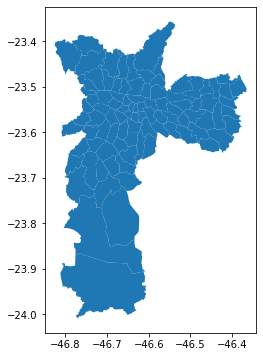

In [ ]:
distritos.plot(figsize=(6, 6))
plt.show()

Transformando coordenadas

In [ ]:
distritos.crs

<Bound CRS: GEOGCS["SIRGAS 2000",DATUM["Sistema_de_Referencia_ ...>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from SIRGAS 2000 to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: SIRGAS 2000

In [ ]:
# Use WGS 84 (epsg:4326) as the geographic coordinate system
distritos = distritos.to_crs(epsg=4326)
print(distritos.crs)
distritos.head()

epsg:4326


,Codigo,Nome,geometry
0,51,MANDAQUI,"POLYGON ((-46.65470 -23.43063, -46.65468 -23.4..."
1,52,MARSILAC,"POLYGON ((-46.60987 -23.90550, -46.60990 -23.9..."
2,32,MOEMA,"POLYGON ((-46.65361 -23.57219, -46.65359 -23.5..."
3,57,PARQUE DO CARMO,"POLYGON ((-46.44461 -23.59272, -46.44470 -23.5..."
4,60,PERDIZES,"POLYGON ((-46.66355 -23.53692, -46.66362 -23.5..."


### 1.2.1 Importando dados das áreas verdes do Município de São Paulo direto da fonte:
[texto do link](http://gestaourbana.prefeitura.sp.gov.br/arquivos/140326_proposta%20de%20substitutivo/05_Areas_Verdes_SHP.zip", dest_folder="/content/drive/MyDrive/Colab Notebooks/SP_Municipio_2021)

In [ ]:
download("http://gestaourbana.prefeitura.sp.gov.br/arquivos/140326_proposta%20de%20substitutivo/05_Areas_Verdes_SHP.zip", dest_folder="/content/drive/MyDrive/Colab Notebooks/SP_Municipio_2021")

saving to /content/drive/MyDrive/Colab Notebooks/SP_Municipio_2021/05_Areas_Verdes_SHP.zip


Descompactando dados

In [ ]:
with zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/SP_Municipio_2021/05_Areas_Verdes_SHP.zip', 'r') as zip_ref:
  zip_ref.extractall('/content/drive/MyDrive/Colab Notebooks/SP_Municipio_2021/01-Mapas')

Plotando dados

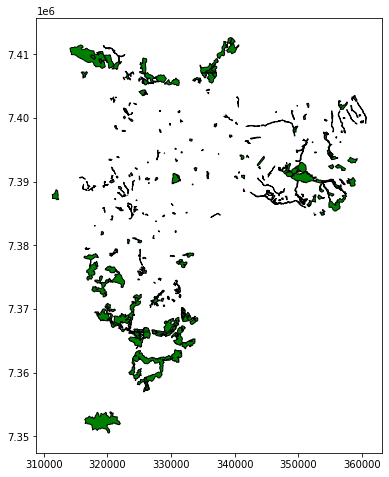

In [ ]:
areas_verdes  = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/SP_Municipio_2021/01-Mapas/SHP/05_Parques_Municipais.shp')
areas_verdes.plot(color='green', edgecolor='black',figsize=(15,8))

Transformando coordenadas

In [ ]:
areas_verdes.crs

<Projected CRS: EPSG:29193>
Name: SAD69 / UTM zone 23S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Brazil - between 48°W and 42°W, northern and southern hemispheres, onshore and offshore.
- bounds: (-48.0, -33.5, -42.0, 5.13)
Coordinate Operation:
- name: UTM zone 23S
- method: Transverse Mercator
Datum: South American Datum 1969
- Ellipsoid: GRS 1967 Modified
- Prime Meridian: Greenwich

In [ ]:
# Use WGS 84 (epsg:4326) as the geographic coordinate system
areas_verdes = areas_verdes.to_crs(epsg=4326)
print(areas_verdes.crs)
areas_verdes.head()

epsg:4326


,OBJECTID,CODIGO,NOME,SITUACAO,SITUAPDE,CATEGORIA,SUBPREFEIT,DISTRITO,DUP,ID,DEPOSITO,IP,TRAMITACAO,AREA_DUP_M,AREA_M2_PO,geometry
0,1.0,PQ_SA_01,CLUBE DO CHUVISCO,OBRAS,EM IMPLANTACAO,URBANO,SANTO AMARO,CAMPO BELO,None,0.0,None,None,None,23767.61,37468.63,"POLYGON ((-46.66337 -23.63624, -46.66340 -23.6..."
1,2.0,PQ_SM_10,DAS NEBULOSAS,OBRAS,EM IMPLANTACAO,URBANO,SAO MATEUS,SAO MATEUS,None,0.0,None,None,None,0.00,61645.96,"POLYGON ((-46.46401 -23.61601, -46.46406 -23.6..."
2,4.0,PQ_IP_02,INDEPENDENCIA AMPLIACAO,OBRAS,EM IMPLANTACAO,URBANO,IPIRANGA,IPIRANGA,None,0.0,None,None,None,0.00,118075.66,"POLYGON ((-46.61034 -23.57789, -46.61023 -23.5..."
3,6.0,PQ_CS_17,JARDIM PRAINHA,OBRAS,EM IMPLANTACAO,URBANO,CAPELA DO SOCORRO,GRAJAU,None,0.0,None,None,None,0.00,92092.13,"MULTIPOLYGON (((-46.65535 -23.75185, -46.65522..."
4,7.0,PQ_BT_02,LINEAR AGUA PODRE (ESMERALDA),OBRAS,EM IMPLANTACAO,LINEAR,BUTANTA,BUTANTA,51542/10_50589/09,0.0,None,None,None,41740.00,89063.53,"MULTIPOLYGON (((-46.75782 -23.57021, -46.75656..."


## 1.3 Gerando site

## 1.3.1 Gerando mapa geral

In [ ]:
mapa_geral = folium.Map(location=[-23.550164466, -46.633664132], tiles = None, zoom_start=10)


## 1.3.2 Gerando mapa em .html

In [ ]:
from folium.features import ColorLine
from math import nan
import folium
import numpy as np
from geopy.geocoders import Nominatim
from folium import plugins


folium.TileLayer('openstreetmap',overlay=True,name = 'Menu').add_to(mapa_geral)



for _, r in distritos.iterrows():
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_d = sim_geo.to_json()
    geo_d = folium.GeoJson(data=geo_d, name= r['Nome'],
                           style_function=lambda x: {'fillColor': 'blue', 'color': 'blue'})
    geo_d.add_to(mapa_geral)

areas_verdes_group = folium.FeatureGroup(name ="Áreas Verdes").add_to(mapa_geral)

for _, r in areas_verdes.iterrows():
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_a = sim_geo.to_json()
    geo_a = folium.GeoJson(data=geo_a, name= r['NOME'],
                           style_function=lambda x: {'fillColor': 'green', 'color': 'green'})
    folium.Popup(r['NOME']).add_to(geo_a)
    areas_verdes_group.add_child(geo_a).add_to(mapa_geral)
	

folium.LayerControl().add_to(mapa_geral)  
#mapa_geral

mapa_geral.save('/content/drive/MyDrive/Colab Notebooks/SP_Municipio_2021/02-Resultados/mapa_distritos_sp.html') 